## Example to extract the persistence diagram over multiple neurons trees

### Extracting the Data

In [1]:
# Step 1: Import the tmd module
import tmd
from tmd.view import plot
from tmd.view import view

import matplotlib.pyplot as plt
import os

In [2]:
# Step 2: Load your morphology (multiple in this case)
data_folder = "Data/Reconstructed/L2_IPC"

# List to store loaded neurons
neurons = []

# Loop through files and load neurons
for filename in os.listdir(data_folder):
    if filename.endswith(".asc"):
        filepath = os.path.join(data_folder, filename)
        
        # Load the neuron
        neu = tmd.io.load_neuron_from_morphio(filepath)
        
        # Store in list
        neurons.append(neu)

print(f"Neurons loaded: {len(neurons)}")

Neurons loaded: 4


### View of the neurons

Plotting neuron 1


<Figure size 600x600 with 0 Axes>

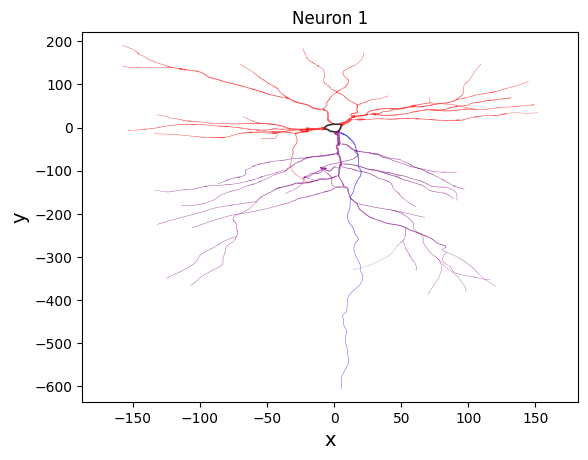

Plotting neuron 2


<Figure size 600x600 with 0 Axes>

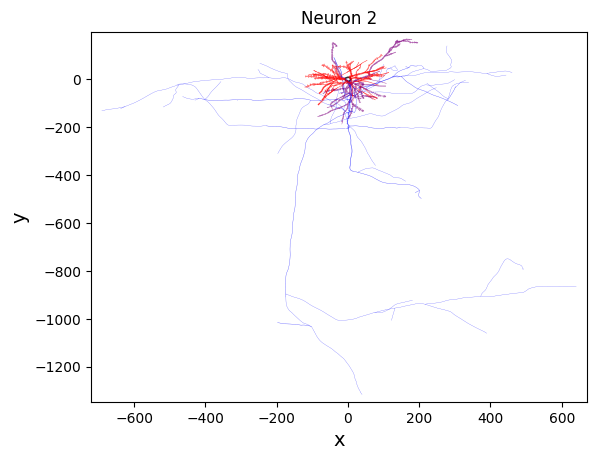

Plotting neuron 3


<Figure size 600x600 with 0 Axes>

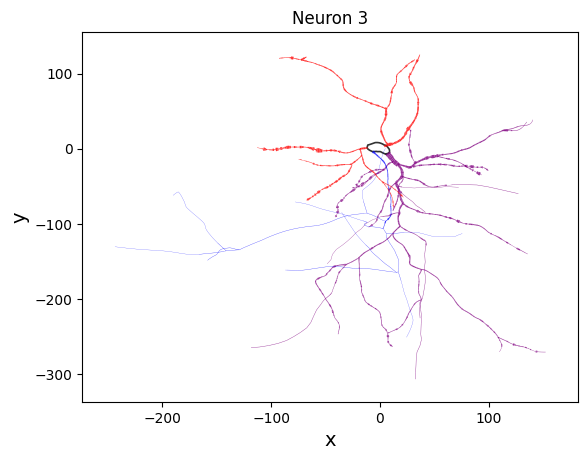

Plotting neuron 4


<Figure size 600x600 with 0 Axes>

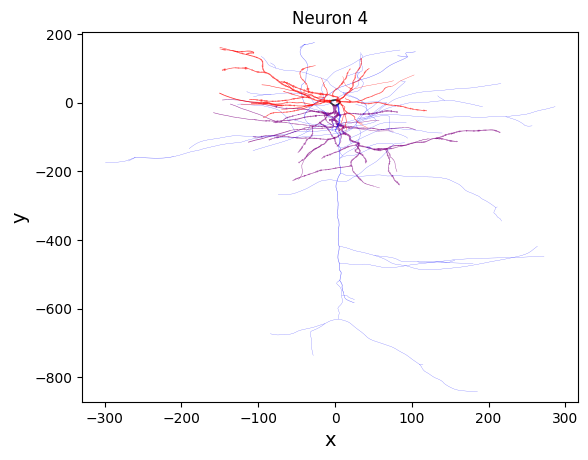

In [3]:
# Loop through all neurons in the list
for i, neu in enumerate(neurons):
    print(f"Plotting neuron {i + 1}")
    
    # Create a new figure for each neuron
    fig = plt.figure(figsize=(6, 6))
    view.neuron(neu)
    plt.title(f"Neuron {i + 1}")
    plt.show()

### Average over all neurons

In [4]:
results = []

for neu in neurons:
    tree = neu.neurites[0] if neu.neurites else None
    ph_tree =  tmd.methods.get_persistence_diagram(tree) if tree else None
    ph_neu =  tmd.methods.get_ph_neuron(neu)
    ph_apical =  tmd.methods.get_ph_neuron(neu, neurite_type="apical_dendrite")
    ph_axon =  tmd.methods.get_ph_neuron(neu, neurite_type="axon")
    ph_basal =  tmd.methods.get_ph_neuron(neu, neurite_type="basal_dendrite")

    results.append({
        "ph_tree": ph_tree,
        "ph_neuron": ph_neu,
        "apical": ph_apical,
        "axon": ph_axon,
        "basal": ph_basal
    })

In [5]:
ph_tree_list = []
ph_neuron_list = []
ph_apical_list = []
ph_axon_list = []
ph_basal_list = []



# Loop through results and collect each PH type
for r in results:
    ph_tree_list.append(r["ph_tree"])
    ph_neuron_list.append(r["ph_neuron"])
    ph_apical_list.append(r["apical"])
    ph_axon_list.append(r["axon"])
    ph_basal_list.append(r["basal"])

(array([[2.12421785e-05, 2.23910426e-05, 2.35005665e-05, ...,
         2.91285273e-10, 2.21797661e-10, 1.68569412e-10],
        [2.16652721e-05, 2.28697771e-05, 2.40381454e-05, ...,
         3.70657035e-10, 2.84029235e-10, 2.17295888e-10],
        [2.20372037e-05, 2.32948604e-05, 2.45198875e-05, ...,
         4.72107759e-10, 3.64134999e-10, 2.80470690e-10],
        ...,
        [5.58738765e-06, 5.57788252e-06, 5.54013365e-06, ...,
         8.81008117e-06, 8.61502046e-06, 8.40780252e-06],
        [5.58589583e-06, 5.58819870e-06, 5.56162660e-06, ...,
         8.55925103e-06, 8.37108038e-06, 8.17146557e-06],
        [5.56012255e-06, 5.57471968e-06, 5.56003778e-06, ...,
         8.30116945e-06, 8.12012405e-06, 7.92830033e-06]], shape=(100, 100)),
 (<Figure size 640x480 with 1 Axes>,
  <Axes: title={'center': 'Average persistence image'}, xlabel='End radial distance', ylabel='Start radial distance'>))

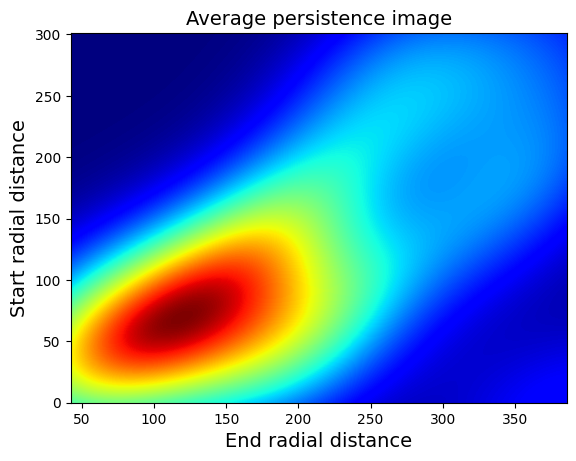

In [6]:
tmd.view.plot.persistence_image_average(ph_tree_list)

(array([[2.12421785e-05, 2.23910426e-05, 2.35005665e-05, ...,
         2.91285273e-10, 2.21797661e-10, 1.68569412e-10],
        [2.16652721e-05, 2.28697771e-05, 2.40381454e-05, ...,
         3.70657035e-10, 2.84029235e-10, 2.17295888e-10],
        [2.20372037e-05, 2.32948604e-05, 2.45198875e-05, ...,
         4.72107759e-10, 3.64134999e-10, 2.80470690e-10],
        ...,
        [5.58738765e-06, 5.57788252e-06, 5.54013365e-06, ...,
         8.81008117e-06, 8.61502046e-06, 8.40780252e-06],
        [5.58589583e-06, 5.58819870e-06, 5.56162660e-06, ...,
         8.55925103e-06, 8.37108038e-06, 8.17146557e-06],
        [5.56012255e-06, 5.57471968e-06, 5.56003778e-06, ...,
         8.30116945e-06, 8.12012405e-06, 7.92830033e-06]], shape=(100, 100)),
 (<Figure size 640x480 with 1 Axes>,
  <Axes: title={'center': 'Average persistence image'}, xlabel='End radial distance', ylabel='Start radial distance'>))

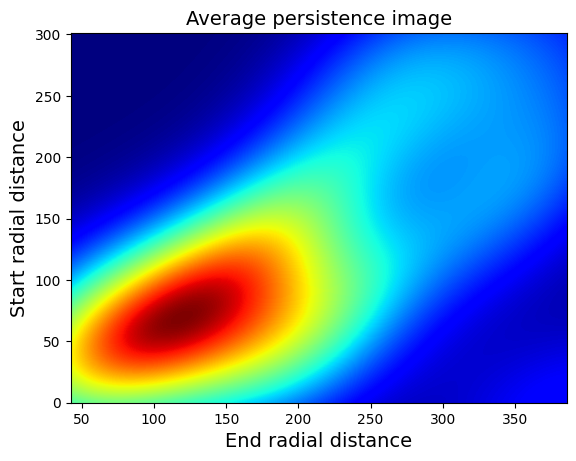

In [7]:
tmd.view.plot.persistence_image_average(ph_apical_list)